# Using Afinn Lexicon

In [1]:
#!pip install afinn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from afinn import Afinn
af = Afinn()

In [4]:
testtext = "Bernice is better than Hillary"
testtext = "WeNeedHillary keep Bernice's muddy revolution stuck in the mud"
af.score(testtext)

-4.0

### Function to call to get positive/negative votes

In [21]:
def getSentiment(keyword,PosNeg):
    data = pd.read_csv(keyword +'.csv',encoding='latin1', names = ['username','datetime','tweet'])
    sentiment_score = [af.score(tweet) for tweet in data['tweet']]
    sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_score]
    df = pd.DataFrame([list(data['username']), list(data['datetime']), list(data['tweet']), sentiment_score, sentiment_category]).T
    df.columns = ['username','datetime', 'tweet', 'sentiment_score', 'sentiment_category']
    df['sentiment_score'] = df.sentiment_score.astype('float')
    
    #group by months and users
    #list_of_sentiment_scores = df.groupby(['datetime','username'])['sentiment_score'].mean().unstack(level=0)
    #all_sentiment_category = ['positive' if score > 0 
    #                              else 'negative' if score < 0 
    #                                  else 'neutral' 
    #                                      for score in list_of_sentiment_scores]

    # set sentiment score to 1 for positive and -1 for negative
    for x in range(12):
        list_of_sentiment_scores.loc[list_of_sentiment_scores[x+1] > 0,x+1] = 1
        list_of_sentiment_scores.loc[list_of_sentiment_scores[x+1] < 0,x+1] = -1
    #df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

    # set all -1 and 0 to NaN
    list_of_sentiment_scores = list_of_sentiment_scores.replace(0, np.nan)
    if PosNeg == "Negative":
        list_of_sentiment_scores = list_of_sentiment_scores.replace(1, np.nan)
    else:
        list_of_sentiment_scores = list_of_sentiment_scores.replace(-1, np.nan)

    # get no of positive in each month
    result = list_of_sentiment_scores.sum()

    # set the datetime column and put the data into DataFrame
    datetime = [1,2,3,4,5,6,7,8,9,10,11,12]
    result_hi = pd.DataFrame({'datetime': datetime,'result': result})

    return result_hi

In [22]:
trump = getSentiment("Trump2", "Positive")
clinton = getSentiment("HillaryClinton", "Positive")

UnboundLocalError: local variable 'list_of_sentiment_scores' referenced before assignment

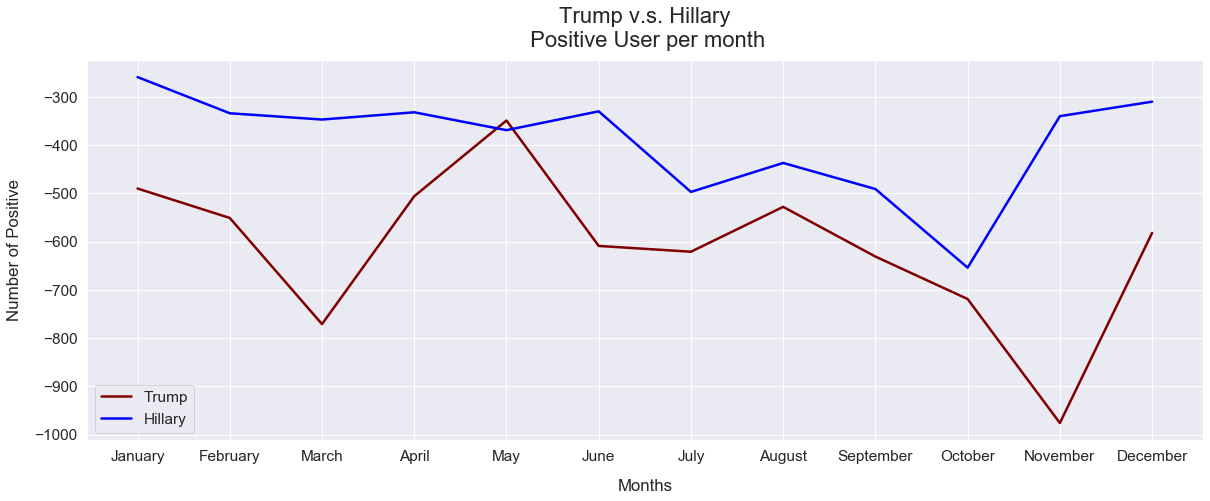

In [20]:
# plot the graph yoooo
sns.set(font_scale=1.4)
trump.set_index('datetime')['result'].plot(figsize=(12, 10), linewidth=2.5, color='maroon', label="Trump")
clinton.set_index('datetime')['result'].plot(figsize=(12, 10), linewidth=2.5, color='blue', label="Hillary")

x_ticks_labels = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks(x, x_ticks_labels)
plt.gcf().set_size_inches(20, 7)

plt.xlabel("Months", labelpad=15)
plt.ylabel("Number of Positive", labelpad=12)
plt.legend()
plt.title("Trump v.s. Hillary\n Positive User per month", y=1.02, fontsize=22);

In [17]:
trump = getSentiment("Trump2", "Negative")
clinton = getSentiment("HillaryClinton", "Negative")

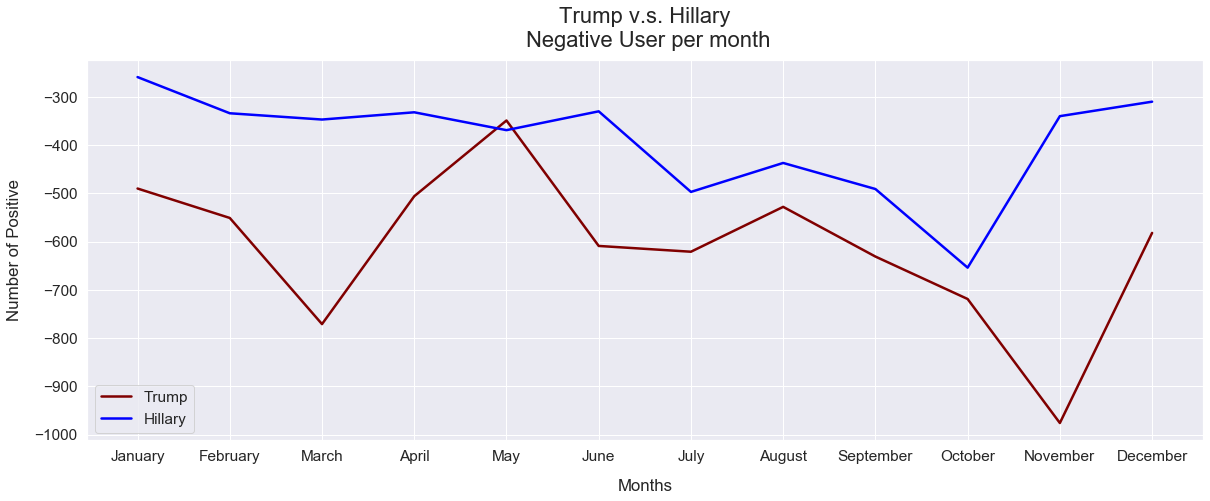

In [19]:
# plot the graph yoooo
sns.set(font_scale=1.4)
trump.set_index('datetime')['result'].plot(figsize=(12, 10), linewidth=2.5, color='maroon', label="Trump")
clinton.set_index('datetime')['result'].plot(figsize=(12, 10), linewidth=2.5, color='blue', label="Hillary")

x_ticks_labels = ["January","February","March","April","May","June","July","August","September","October","November","December"]
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks(x, x_ticks_labels)
plt.gcf().set_size_inches(20, 7)

plt.xlabel("Months", labelpad=15)
plt.ylabel("Number of Positive", labelpad=12)
plt.legend()
plt.title("Trump v.s. Hillary\n Negative User per month", y=1.02, fontsize=22);

In [9]:

data = pd.read_csv('HillaryClinton' +'.csv',encoding='latin1', names = ['username','datetime','tweet'])
sentiment_score = [af.score(tweet) for tweet in data['tweet']]
sentiment_category = ['positive' if score > 0 
                      else 'negative' if score < 0 
                          else 'neutral' 
                              for score in sentiment_score]
df = pd.DataFrame([list(data['username']), list(data['datetime']), list(data['tweet']), sentiment_score, sentiment_category]).T
df.columns = ['username','datetime', 'tweet', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')

#group by months and users
list_of_sentiment_scores = df.groupby(['datetime','username'])['sentiment_score'].mean().unstack(level=0)
all_sentiment_category = ['positive' if score > 0 
                              else 'negative' if score < 0 
                                  else 'neutral' 
                                      for score in list_of_sentiment_scores]

# set sentiment score to 1 for positive and -1 for negative
for x in range(12):
    list_of_sentiment_scores.loc[list_of_sentiment_scores[x+1] > 0,x+1] = 1
    list_of_sentiment_scores.loc[list_of_sentiment_scores[x+1] < 0,x+1] = -1
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

# set all -1 and 0 to NaN
#list_of_sentiment_scores.fillna(-1)
#list_of_sentiment_scores.fillna(0)
print(list_of_sentiment_scores)

# get no of positive in each month
result = list_of_sentiment_scores.sum()

# set the datetime column and put the data into DataFrame
datetime = [1,2,3,4,5,6,7,8,9,10,11,12]
result_hi = pd.DataFrame({'datetime': datetime,'result': result})

#return result_hi

datetime        1   2    3    4    5    6    7   8    9    10  11  12
username                                                             
0034_expat     NaN NaN  NaN  0.0  NaN  NaN  NaN NaN  NaN  NaN NaN NaN
007maryrosep   NaN NaN  NaN  NaN  NaN  NaN  0.0 NaN  NaN  NaN NaN NaN
00FastEddie    NaN NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  0.0 NaN NaN
00_showtime    NaN NaN  NaN  NaN  NaN  NaN  NaN NaN  0.0  NaN NaN NaN
0153phil       NaN NaN -1.0  NaN  0.0  1.0 -1.0 NaN  NaN  NaN NaN NaN
...            ...  ..  ...  ...  ...  ...  ...  ..  ...  ...  ..  ..
zoeelair       NaN NaN  NaN  NaN  NaN  0.0  NaN NaN  NaN  NaN NaN NaN
zoomtunes_net  NaN NaN  NaN  NaN  0.0  NaN  NaN NaN  NaN  1.0 NaN NaN
zorubd         NaN NaN  NaN  NaN  NaN  0.0  NaN NaN  1.0  NaN NaN NaN
zoswizard      NaN NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  1.0 NaN NaN
zroseh         0.0 NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN

[14151 rows x 12 columns]


In [11]:
#list_of_sentiment_scores.fillna(0)
list_of_sentiment_scores.replace(0, np.nan)
list_of_sentiment_scores.replace(1, np.nan)

datetime,1,2,3,4,5,6,7,8,9,10,11,12
username,,,,,,,,,,,,
0034_expat,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007maryrosep,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
00FastEddie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
00_showtime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
0153phil,NaN,NaN,-1.0,NaN,0.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
zoeelair,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
zoomtunes_net,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zorubd,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def NoOfPosNeg(filename):
    data = pd.read_csv(filename,encoding='latin1', names = ['username','datetime','tweet'])
    sentiment_scores = [af.score(tweet) for tweet in data['tweet']]
    sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    df = pd.DataFrame([list(data['username']), list(data['tweet']), sentiment_scores, sentiment_category]).T
    df.columns = ['username', 'tweet', 'sentiment_score', 'sentiment_category']
    df['sentiment_score'] = df.sentiment_score.astype('float')
    list_of_sentiment_scores = df.groupby('username')['sentiment_score'].mean()
    all_sentiment_category = ['positive' if score > 0 
                              else 'negative' if score < 0 
                                  else 'neutral' 
                                      for score in list_of_sentiment_scores]
    return all_sentiment_category, list_of_sentiment_scores

In [5]:
clintons = NoOfPosNeg('HillaryClinton.csv')

In [13]:
print(clintons[1])


username
0034_expat       0.000000
007maryrosep     0.000000
00FastEddie      0.000000
00_showtime      0.000000
0153phil         0.461538
                   ...   
zoeelair         0.000000
zoomtunes_net    0.400000
zorubd           0.500000
zoswizard        3.000000
zroseh           0.000000
Name: sentiment_score, Length: 14151, dtype: float64


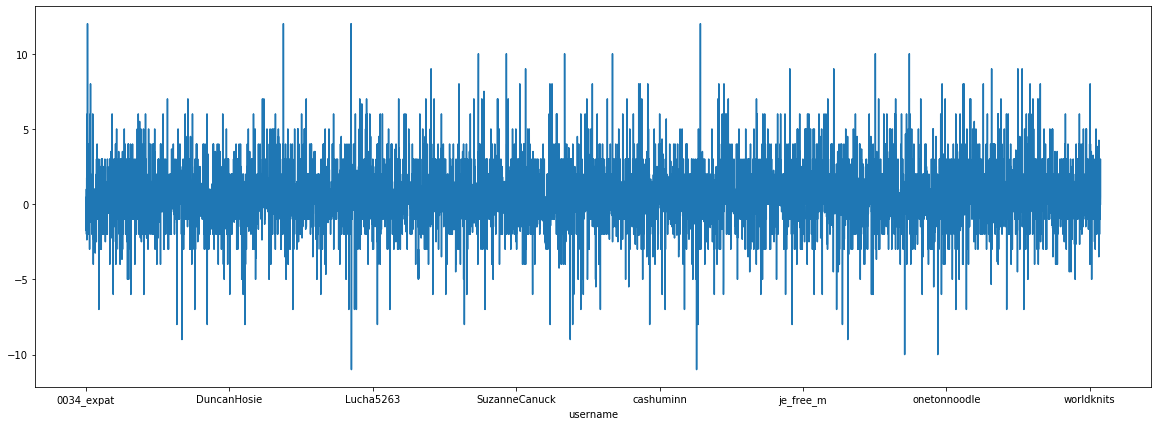

-11.0
12.0


In [29]:
clintons[1].plot()
plt.gcf().set_size_inches(20, 7)
plt.show()
print(clintons[1].min())
print(clintons[1].max())

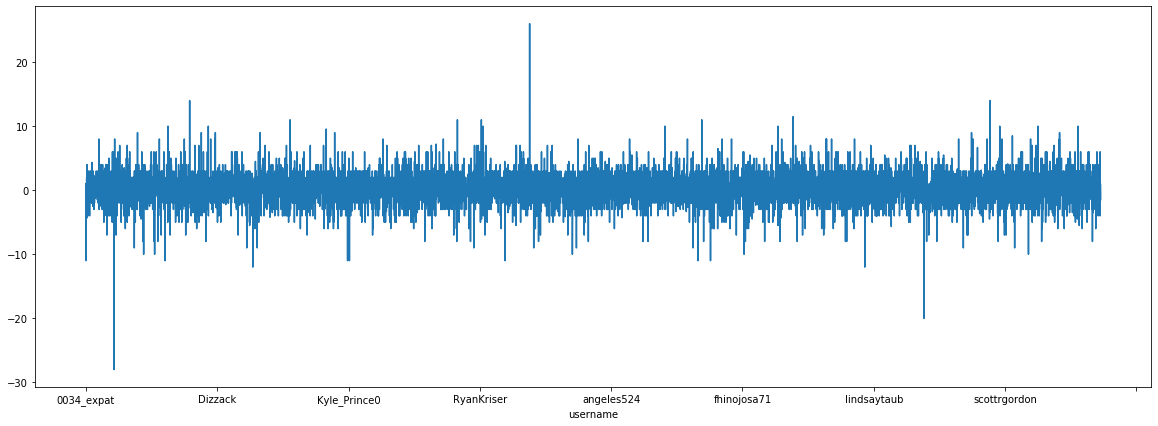

-28.0
26.0


In [30]:
trump = NoOfPosNeg('Trump2.csv')
trump[1].plot()
plt.gcf().set_size_inches(20, 7)
plt.show()
print(trump[1].min())
print(trump[1].max())

In [33]:
clintons_pos = clintons[0].count('positive')
trump_pos = trump[0].count('positive')
clintons_neg = clintons[0].count('negative')
trump_neg = trump[0].count('negative')
print(len(trump[0]))
print(len(clintons[0]))

19318
14151


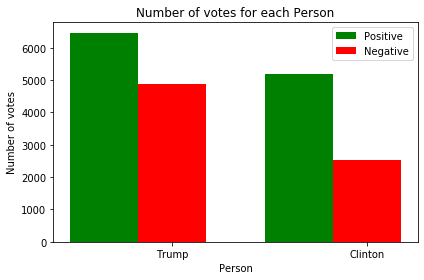

In [34]:
#votes_dic = {'trump': trump, 'clintons': clintons}
#votes = pd.DataFrame(votes_dic)
#votes

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

Positive = (trump_pos, clintons_pos)
Negative = (trump_neg, clintons_neg)

Positive_bar = plt.bar(index, Positive, bar_width, color='g', label='Positive')
Negative_bar = plt.bar(index + bar_width, Negative, bar_width, color='r', label='Negative')

plt.xlabel('Person')
plt.ylabel('Number of votes')
plt.title('Number of votes for each Person')
plt.xticks(index + bar_width,('Trump', 'Clinton'))
plt.legend()

plt.tight_layout()
plt.show()

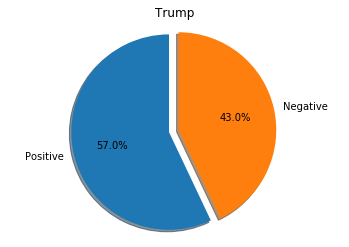

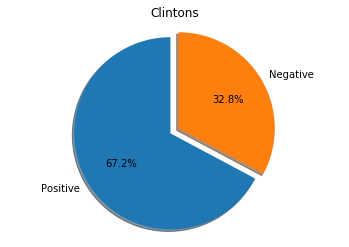

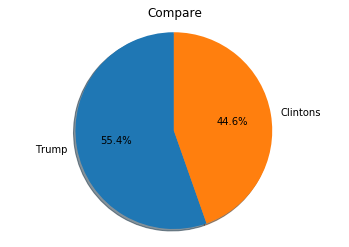

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#for trump:
labels = 'Positive', 'Negative'
sizes = [trump_pos, trump_neg]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Trump')
plt.show()

#for clinton:
sizes = [clintons_pos, clintons_neg]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Clintons')
plt.show()

# compare
labels = 'Trump', 'Clintons'
sizes = [trump_pos, clintons_pos]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Compare')
plt.show()

### Overall without looking at users/months

In [39]:
both = pd.read_csv('Both.csv',encoding='latin1', names = ['username','datetime','tweet','from'])
sentiment_scores = [af.score(tweet) for tweet in both['tweet']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
# sentiment statistics per trump/clinton
df = pd.DataFrame([list(both['username']), list(both['tweet']), sentiment_scores, sentiment_category, list(both['from'])]).T
df.columns = ['username','tweet', 'sentiment_score', 'sentiment_category','from']
df.groupby(by=['from']).describe()

username                               tweet          \
           count unique           top   freq   count  unique   
from                                                           
Hillary    81789  14151     jkruzel25   1627   81789   81789   
Trump     197428  19318  AppaloosaGuy  46056  197428  142633   

                                                                  \
                                                       top  freq   
from                                                               
Hillary  DECISION | Clinton's chief sizes up battlegrou...     1   
Trump                               Forecast: Fine weather  6500   

        sentiment_score                      sentiment_category         \
                  count unique  top     freq              count unique   
from                                                                     
Hillary         81789.0   34.0  0.0  44782.0              81789      3   
Trump          197428.0   48.0  0.0  82910.0             197428      3   

                         
             top   freq  
from                     
Hillary  neutral  44782  
Trump    neutral  82910

In [53]:
#list_of_sentiment_scores = df.groupby(['username','from'])['sentiment_score'].mean().unstack(level=0)
df.groupby(by=['username','from']).describe()

tweet         \
                      count unique   
username      from                   
0034_expat    Hillary     2      2   
              Trump       1      1   
007maryrosep  Hillary     4      4   
00FastEddie   Hillary     1      1   
00_showtime   Hillary     1      1   
...                     ...    ...   
zulematovilla Trump       1      1   
zusettST      Trump       2      2   
zwallace8908  Trump       2      2   
zwilcoxen     Trump       3      3   
zyonseven     Trump       8      5   

                                                                               \
                                                                     top freq   
username      from                                                              
0034_expat    Hillary        ¿Hay vida aparte de las elecciones en eeuu?    1   
              Trump    La tercera vía merchandising kanye kanyewest e...    1   
007maryrosep  Hillary          Took a picture with Hillary, it's casual.    1   
00FastEddie   Hillary  Pinwheel junction brooklyn pratt Hill Neighbor...    1   
00_showtime   Hillary  Listen to "TRILL CLINTON" LINK IN BIO Arkansas...    1   
...                                                                  ...  ...   
zulematovilla Trump                              Dirigido a Donald trump    1   
zusettST      Trump    ( Hermanos Rodríguez - autodromohr in Iztacalc...    1   
zwallace8908  Trump    Gay Against Trump LoveIsLove LoveIsLouder Love...    1   
zwilcoxen     Trump                           I will miss you in the uk.    1   
zyonseven     Trump    If trump can rally up hate & violence, then ma...    2   

                      sentiment_score                  sentiment_category  \
                                count unique  top freq              count   
username      from                                                          
0034_expat    Hillary             2.0    1.0  0.0  2.0                  2   
              Trump               1.0    1.0  0.0  1.0                  1   
007maryrosep  Hillary             4.0    1.0  0.0  4.0                  4   
00FastEddie   Hillary             1.0    1.0  0.0  1.0                  1   
00_showtime   Hillary             1.0    1.0  0.0  1.0                  1   
...                               ...    ...  ...  ...                ...   
zulematovilla Trump               1.0    1.0  0.0  1.0                  1   
zusettST      Trump               2.0    1.0  0.0  2.0                  2   
zwallace8908  Trump               2.0    2.0 -3.0  1.0                  2   
zwilcoxen     Trump               3.0    3.0 -2.0  1.0                  3   
zyonseven     Trump               8.0    2.0  0.0  6.0                  8   

                                            
                      unique      top freq  
username      from                          
0034_expat    Hillary      1  neutral    2  
              Trump        1  neutral    1  
007maryrosep  Hillary      1  neutral    4  
00FastEddie   Hillary      1  neutral    1  
00_showtime   Hillary      1  neutral    1  
...                      ...      ...  ...  
zulematovilla Trump        1  neutral    1  
zusettST      Trump        1  neutral    2  
zwallace8908  Trump        2  neutral    1  
zwilcoxen     Trump        3  neutral    1  
zyonseven     Trump        2  neutral    6  

[33469 rows x 12 columns]

In [11]:
df['sentiment_category'].value_counts()

neutral     127692
negative     77881
positive     73644
Name: sentiment_category, dtype: int64

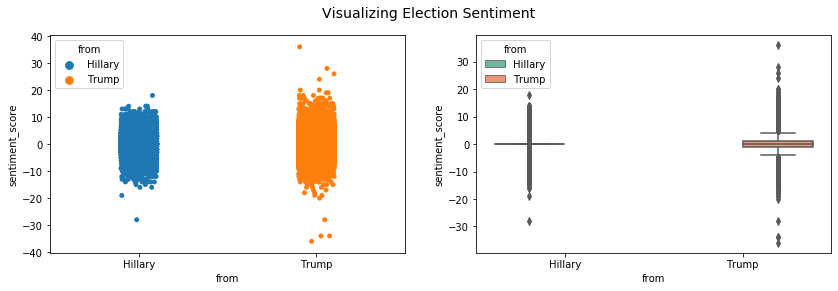

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='from', y="sentiment_score", 
                   hue='from', data=df, ax=ax1)
bp = sns.boxplot(x='from', y="sentiment_score", 
                 hue='from', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Election Sentiment', fontsize=14)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


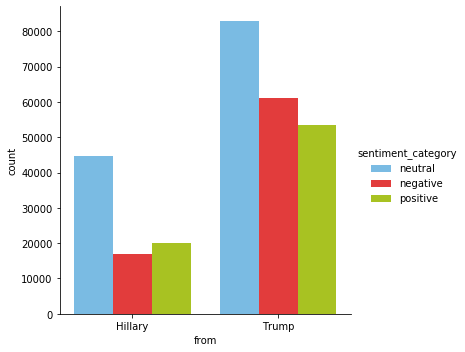

In [14]:
fc = sns.factorplot(x="from", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})